# Customer Segmentation

### Problem Statement:  
XYZ bank wants to roll out Christmas offers to their customers. But Bank does not want to roll out same offer to all customers  instead they want to roll out personalized offer to particular set of customers. If they manually start understanding the category of customer then this will be not efficient and also they will not be able to uncover the hidden pattern in the data ( pattern which group certain kind of customer in one category). Bank approached ABC analytics company to solve their problem. Bank also shared information with ABC analytics that they don't want more than 5 group as this will be inefficient for their campaign.

ML Problem: ABC analytics proposed customer segmentation approach to Bank.

ABC analytics assigned this talk to their analytics team and instructed their team to come up with the approach and feature which group similar behavior customer in one category and others in different category.

Note: Please read problem statement carefully and propose the approach which should be as per the customer requirement.

Task:

1. Business Understanding

2. Data Understanding

3. EDA

4. Feature Engineering

4. Model Building

5. Model Evaluation

6. Presentation (Recommendation slide is must)

7. Document the challenges

### Business Understanding

* As per the problem statement it can be inferred that the problem statement and dataset are from banking domain, the key  notes are 
 i) Data is to be clustered to enable bank for rolling out the offers.
 ii) Not more than 5 clusters to be formed.
 iii) Patterns have to be observed in data along with clustering.
 
Type of offers that bank want to roll out is not provided. 

### Data understanding

* As per preliminary understanding the datacolumns are in different languages and their corresponding description follows :

* fecha_dato::  The table is partitioned for this column
* ncodpers::  Customer code
* ind_empleado::  Employee index: A active, B ex employed, F filial, N not employee, P pasive
* pais_residencia::  Customer's Country residence
* sexo::  Customer's sex
* age::  Age
* fecha_alta::  The date in which the customer became as the first holder of a contract in the bank
* ind_nuevo::  New customer Index. 1 if the customer registered in the last 6 months.
* antiguedad::  Customer seniority (in months)
* indrel::  1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
* ult_fec_cli_1t::  Last date as primary customer (if he isn't at the end of the month)
* indrel_1mes::  Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
* tiprel_1mes::  Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)
* indresi::  Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)
* indext::  Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
* conyuemp::  Spouse index. 1 if the customer is spouse of an employee
* canal_entrada::  channel used by the customer to join
* indfall::  Deceased index. N/S
* tipodom::  Addres type. 1, primary address
* cod_prov::  Province code (customer's address)
* nomprov::  Province name
* ind_actividad_cliente::  Activity index (1, active customer; 0, inactive customer)
* renta::  Gross income of the household
* ind_ahor_fin_ult1::  Saving Account
* ind_aval_fin_ult1::  Guarantees
* ind_cco_fin_ult1::  Current Accounts
* ind_cder_fin_ult1::  Derivada Account
* ind_cno_fin_ult1::  Payroll Account
* ind_ctju_fin_ult1::  Junior Account
* ind_ctma_fin_ult1::  Más particular Account
* ind_ctop_fin_ult1::  particular Account
* ind_ctpp_fin_ult1::  particular Plus Account
* ind_deco_fin_ult1::  Short-term deposits
* ind_deme_fin_ult1::  Medium-term deposits
* ind_dela_fin_ult1::  Long-term deposits
* ind_ecue_fin_ult1::  e-account
* ind_fond_fin_ult1::  Funds
* ind_hip_fin_ult1::  Mortgage
* ind_plan_fin_ult1::  Pensions
* ind_pres_fin_ult1::  Loans
* ind_reca_fin_ult1::  Taxes
* ind_tjcr_fin_ult1::  Credit Card
* ind_valo_fin_ult1::  Securities
* ind_viv_fin_ult1::  Home Account
* ind_nomina_ult1::  Payroll
* ind_nom_pens_ult1::  Pensions
* ind_recibo_ult1::  Direct Debit


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy.stats import zscore

#Encoding techniques
from sklearn.preprocessing import OrdinalEncoder

#Imputation techniques
from sklearn.impute import KNNImputer

In [2]:
data=pd.read_csv("D:\Krsna\Projects\Data Glacier\Customer Segmentation\cust_seg.csv" , low_memory=False)

In [4]:
data.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
data.shape

(1000000, 48)

> Inferences:
* Data set has 48 columns and 10lakh/1million rows

#### Renaming columns for better understanding of data

In [3]:
# Rename all column name
data.rename(columns= {'fecha_dato':'Date_Partition', 'ncodpers':'Customer_code', 'ind_empleado':'Employee_index', 'pais_residencia':'Cust_residence_country', 'sexo':'Cust_gender', 
'age':'Age', 'fecha_alta':'Date_first_contract', 'ind_nuevo':'New_customer_Index', 'antiguedad':'Customer_seniority_months', 'indrel':'Primary_cust_index', 'ult_fec_cli_1t':'Last_date_primary_cust', 
'indrel_1mes':'Cust_type', 'tiprel_1mes':'Cust_relation', 'indresi':'Residence_index', 'indext':'Foreigner_index', 'conyuemp':'Spouse_index', 'canal_entrada':'Channel_cust_join', 'indfall':'Deceased_index', 
'tipodom':'Address_type', 'cod_prov':'Province_code_cust', 'nomprov':'Province_name', 'ind_actividad_cliente':'Cust_activity', 'renta':'Gross_income', 'ind_ahor_fin_ult1':'Saving_Account', 
'ind_aval_fin_ult1':'Guarantees', 'ind_cco_fin_ult1':'Current_Account', 'ind_cder_fin_ult1':'Derivada_Account', 'ind_cno_fin_ult1':'Payroll_Account', 'ind_ctju_fin_ult1':'Junior_Account', 
'ind_ctma_fin_ult1':'Más_particular_Account', 'ind_ctop_fin_ult1':'Particular_Account', 'ind_ctpp_fin_ult1':'Particular_Plus_Account', 'ind_deco_fin_ult1':'Short_term_deposits', 
'ind_deme_fin_ult1':'Medium_term_deposits', 'ind_dela_fin_ult1':'Long_term_deposits', 'ind_ecue_fin_ult1':'e_account', 'ind_fond_fin_ult1':'Funds', 'ind_hip_fin_ult1':'Mortgage',
'ind_plan_fin_ult1':'Pensions', 'ind_pres_fin_ult1':'Loans', 'ind_reca_fin_ult1':'Taxes', 'ind_tjcr_fin_ult1':'Credit_Card', 'ind_valo_fin_ult1':'Securities', 
'ind_viv_fin_ult1':'Home_Account', 'ind_nomina_ult1':'Payroll', 'ind_nom_pens_ult1':'Pensions_nom', 'ind_recibo_ult1':'Direct_Debit'}, inplace= True)


data.head()

,Unnamed: 0,Date_Partition,Customer_code,Employee_index,Cust_residence_country,Cust_gender,Age,Date_first_contract,New_customer_Index,Customer_seniority_months,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions_nom,Direct_Debit
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0


In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0                 1000000 non-null  int64  
 1   Date_Partition             1000000 non-null  object 
 2   Customer_code              1000000 non-null  int64  
 3   Employee_index             989218 non-null   object 
 4   Cust_residence_country     989218 non-null   object 
 5   Cust_gender                989214 non-null   object 
 6   Age                        1000000 non-null  object 
 7   Date_first_contract        989218 non-null   object 
 8   New_customer_Index         989218 non-null   float64
 9   Customer_seniority_months  1000000 non-null  object 
 10  Primary_cust_index         989218 non-null   float64
 11  Last_date_primary_cust     1101 non-null     object 
 12  Cust_type                  989218 non-null   float64
 13  Cust_relation

> Inferences from info()

* column Unnamed: 0 is index and can be dropped.
* dtypes of columns like Date_Partition,Date_first_contract are object and to be changed to date
* columns are distributed between both categorical and continuous
* Nulls can be observed in many columns have to be addressed
* columns  Spouse_index , Last_date_primary_cust almost have 99% nulls when compared to quantum of data, have to be analysed and dealt   with.
* column Gross_income has considerate amount of nulls which is to be addressed


In [7]:
data.describe()

,Unnamed: 0,Customer_code,New_customer_Index,Primary_cust_index,Cust_type,Address_type,Province_code_cust,Cust_activity,Gross_income,Saving_Account,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions_nom,Direct_Debit
count,1000000.000000,1.000000e+06,989218.000000,989218.000000,989218.000000,989218.0,982266.000000,989218.000000,8.248170e+05,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,994598.000000,994598.000000,1000000.000000
mean,499999.500000,6.905967e+05,0.000489,1.109074,1.000085,1.0,26.852131,0.564971,1.396462e+05,0.000177,...,0.009982,0.014553,0.004661,0.072581,0.066084,0.039378,0.006442,0.071629,0.079543,0.166275
std,288675.278933,4.044084e+05,0.022114,3.267624,0.012954,0.0,12.422924,0.495761,2.389858e+05,0.013303,...,0.099410,0.119755,0.068112,0.259448,0.248429,0.194493,0.080003,0.257873,0.270584,0.372327
min,0.000000,1.588900e+04,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.202730e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249999.750000,3.364110e+05,0.000000,1.000000,1.000000,1.0,18.000000,0.000000,7.157184e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,499999.500000,6.644760e+05,0.000000,1.000000,1.000000,1.0,28.000000,1.000000,1.066519e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,749999.250000,1.074511e+06,0.000000,1.000000,1.000000,1.0,33.000000,1.000000,1.634325e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,999999.000000,1.379131e+06,1.000000,99.000000,3.000000,1.0,52.000000,1.000000,2.889440e+07,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Inferences from describe

* considerable difference between mean and 50% percentile can be observed in some column ind_actividad_cliente
* Outliers are not specifically visible from descriptive stats, have to be further analysed using standard methods

#### changing the data type of date columns

In [4]:
data['Date_Partition'] = pd.to_datetime(data['Date_Partition'])
data['Date_first_contract'] = pd.to_datetime(data['Date_first_contract'])
data['Last_date_primary_cust'] = pd.to_datetime(data['Last_date_primary_cust'])

#### analysing and addressing the 99% nulls in columns Spouse_index , Last_date_primary_cust

In [9]:
print("Unique values of spouse index are : " , data['Spouse_index'].unique())
print("\n counts of different values : \n" ,data['Spouse_index'].value_counts())

Unique values of spouse index are :  [nan 'N' 'S']

 counts of different values : 
 N    176
S      2
Name: Spouse_index, dtype: int64


> Inference: 
* Spouse index is a flag to identify if the customer is spouse of exiting staff with bank, given the problem statement for cluster formation to understand customer base and for design and better outreach of produts , spouse index has least value in terms of effecting the clustering. imputation of nulls in spouse index with non spouse is similar to absence of column.

* It can be understood that the column can be dropped.

In [10]:
print("Unique values of Last_date_primary_cust are : " , data['Last_date_primary_cust'].unique())
print("\n counts of different values : \n" ,data['Last_date_primary_cust'].value_counts())

Unique values of Last_date_primary_cust are :  [                          'NaT' '2015-07-02T00:00:00.000000000'
 '2015-07-23T00:00:00.000000000' '2015-07-06T00:00:00.000000000'
 '2015-07-30T00:00:00.000000000' '2015-07-20T00:00:00.000000000'
 '2015-07-08T00:00:00.000000000' '2015-07-22T00:00:00.000000000'
 '2015-07-17T00:00:00.000000000' '2015-07-09T00:00:00.000000000'
 '2015-07-03T00:00:00.000000000' '2015-07-29T00:00:00.000000000'
 '2015-07-13T00:00:00.000000000' '2015-07-21T00:00:00.000000000'
 '2015-07-27T00:00:00.000000000' '2015-07-14T00:00:00.000000000'
 '2015-07-01T00:00:00.000000000' '2015-07-24T00:00:00.000000000'
 '2015-07-15T00:00:00.000000000' '2015-07-16T00:00:00.000000000'
 '2015-07-28T00:00:00.000000000' '2015-07-07T00:00:00.000000000'
 '2015-07-10T00:00:00.000000000']

 counts of different values : 
 2015-07-01    97
2015-07-09    81
2015-07-06    76
2015-07-21    67
2015-07-07    63
2015-07-17    59
2015-07-28    57
2015-07-10    55
2015-07-15    54
2015-07-24    54
2

> Inference:
    
* Importance of column  Last_date_primary_cust is not clear , but column has only 1101 records and imputing approximately 9.99 million recors is not feasible.

* It is understood that the column can be dropped

In [5]:
data.drop(columns=['Unnamed: 0','Spouse_index','Last_date_primary_cust'],inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 45 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Date_Partition             1000000 non-null  datetime64[ns]
 1   Customer_code              1000000 non-null  int64         
 2   Employee_index             989218 non-null   object        
 3   Cust_residence_country     989218 non-null   object        
 4   Cust_gender                989214 non-null   object        
 5   Age                        1000000 non-null  object        
 6   Date_first_contract        989218 non-null   datetime64[ns]
 7   New_customer_Index         989218 non-null   float64       
 8   Customer_seniority_months  1000000 non-null  object        
 9   Primary_cust_index         989218 non-null   float64       
 10  Cust_type                  989218 non-null   float64       
 11  Cust_relation              989218 non-

In [6]:
# Checking the duplicates in data
data.duplicated().sum()

0

In [14]:
# Checking the columns with null values
data.isna().sum()

Date_Partition                    0
Customer_code                     0
Employee_index                10782
Cust_residence_country        10782
Cust_gender                   10786
Age                               0
Date_first_contract           10782
New_customer_Index            10782
Customer_seniority_months         0
Primary_cust_index            10782
Cust_type                     10782
Cust_relation                 10782
Residence_index               10782
Foreigner_index               10782
Channel_cust_join             10861
Deceased_index                10782
Address_type                  10782
Province_code_cust            17734
Province_name                 17734
Cust_activity                 10782
Gross_income                 175183
Saving_Account                    0
Guarantees                        0
Current_Account                   0
Derivada_Account                  0
Payroll_Account                   0
Junior_Account                    0
Más_particular_Account      

In [15]:
data[data.columns[data.isna().any()].tolist()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Employee_index          989218 non-null  object        
 1   Cust_residence_country  989218 non-null  object        
 2   Cust_gender             989214 non-null  object        
 3   Date_first_contract     989218 non-null  datetime64[ns]
 4   New_customer_Index      989218 non-null  float64       
 5   Primary_cust_index      989218 non-null  float64       
 6   Cust_type               989218 non-null  float64       
 7   Cust_relation           989218 non-null  object        
 8   Residence_index         989218 non-null  object        
 9   Foreigner_index         989218 non-null  object        
 10  Channel_cust_join       989139 non-null  object        
 11  Deceased_index          989218 non-null  object        
 12  Address_type            98921

In [ ]:
# Analysing the categorical columns

In [16]:
# Employee index
print("No of Unique Values: " , data["Employee_index"].nunique())
print("\n Count of unique values : \n",data["Employee_index"].value_counts())

No of Unique Values:  5

 Count of unique values : 
 N    988260
B       387
A       287
F       282
S         2
Name: Employee_index, dtype: int64


In [17]:
# Cust_residence_country
print("No of Unique Values: " , data["Cust_residence_country"].nunique())
print("\n Count of unique values : \n",data["Cust_residence_country"].value_counts())

No of Unique Values:  113

 Count of unique values : 
 ES    982264
FR       546
AR       542
DE       487
GB       480
       ...  
TN         2
LB         2
GE         2
BZ         2
AL         1
Name: Cust_residence_country, Length: 113, dtype: int64


In [18]:
# Gender of customer
print("No of Unique Values: " , data["Cust_gender"].nunique())
print("\n Count of unique values : \n",data["Cust_gender"].value_counts())


No of Unique Values:  2

 Count of unique values : 
 V    562000
H    427214
Name: Cust_gender, dtype: int64


In [19]:
# Cust_relation
print("No of Unique Values: " , data["Cust_relation"].nunique())
print("\n Count of unique values : \n",data["Cust_relation"].value_counts())

No of Unique Values:  3

 Count of unique values : 
 A    547800
I    441377
P        41
Name: Cust_relation, dtype: int64


In [20]:
# Residence_index
print("No of Unique Values: " , data["Residence_index"].nunique())
print("\n Count of unique values : \n",data["Residence_index"].value_counts())

No of Unique Values:  2

 Count of unique values : 
 S    982264
N      6954
Name: Residence_index, dtype: int64


In [21]:
# Foreigner_index
print("No of Unique Values: " , data["Foreigner_index"].nunique())
print("\n Count of unique values : \n",data["Foreigner_index"].value_counts())

No of Unique Values:  2

 Count of unique values : 
 N    946328
S     42890
Name: Foreigner_index, dtype: int64


In [22]:
#Channel_cust_join
print("No of Unique Values: " , data["Channel_cust_join"].nunique())
print("\n Count of unique values : \n",data["Channel_cust_join"].value_counts())

No of Unique Values:  156

 Count of unique values : 
 KAT    313944
KFC    259035
KHE    249254
KFA     37733
KAS      8190
        ...  
KDI         2
KDB         2
KBN         2
KGN         1
KGC         1
Name: Channel_cust_join, Length: 156, dtype: int64


In [23]:
#Deceased_index
print("No of Unique Values: " , data["Deceased_index"].nunique())
print("\n Count of unique values : \n",data["Deceased_index"].value_counts())

No of Unique Values:  2

 Count of unique values : 
 N    986107
S      3111
Name: Deceased_index, dtype: int64


In [24]:
#Province_name 
print("No of Unique Values: " , data["Province_name"].nunique())
print("\n Count of unique values : \n",data["Province_name"].value_counts())

No of Unique Values:  52

 Count of unique values : 
 MADRID                    360131
BARCELONA                  87372
VALENCIA                   46394
SEVILLA                    43922
CORUÑA, A                  27545
MALAGA                     26798
MURCIA                     24782
ZARAGOZA                   24621
ALICANTE                   20323
CADIZ                      20292
ASTURIAS                   18399
PONTEVEDRA                 17482
VALLADOLID                 16657
PALMAS, LAS                15976
BIZKAIA                    15597
GRANADA                    12930
TOLEDO                     12131
BADAJOZ                    11909
CANTABRIA                  11264
SALAMANCA                  10650
CORDOBA                     9829
BALEARS, ILLES              8361
CACERES                     8347
HUELVA                      7923
CIUDAD REAL                 7782
ALBACETE                    7294
CASTELLON                   6711
NAVARRA                     6584
BURGOS                

In [25]:
# Cust_type  Float
print("No of Unique Values: " , data["Cust_type"].nunique())
print("\n Count of unique values : \n",data["Cust_type"].value_counts())

No of Unique Values:  3

 Count of unique values : 
 1.0    989175
3.0        41
2.0         2
Name: Cust_type, dtype: int64


In [26]:
# Primary_cust_indexr Float
print("No of Unique Values: " , data["Primary_cust_index"].nunique())
print("\n Count of unique values : \n",data["Primary_cust_index"].value_counts())

No of Unique Values:  2

 Count of unique values : 
 1.0     988117
99.0      1101
Name: Primary_cust_index, dtype: int64


In [27]:
# New Customer Index  Float
print("No of Unique Values: " , data["New_customer_Index"].nunique())
print("\n Count of unique values : \n",data["New_customer_Index"].value_counts())

No of Unique Values:  2

 Count of unique values : 
 0.0    988734
1.0       484
Name: New_customer_Index, dtype: int64


In [28]:
#Cust_activity  Float
print("No of Unique Values: " , data["Cust_activity"].nunique())
print("\n Count of unique values : \n",data["Cust_activity"].value_counts())

No of Unique Values:  2

 Count of unique values : 
 1.0    558879
0.0    430339
Name: Cust_activity, dtype: int64


In [29]:
#Payroll Float
print("No of Unique Values: " , data["Payroll"].nunique())
print("\n Count of unique values : \n",data["Payroll"].value_counts())

No of Unique Values:  2

 Count of unique values : 
 0.0    923356
1.0     71242
Name: Payroll, dtype: int64


In [30]:
#Pension_nom Float
print("No of Unique Values: " , data["Pensions_nom"].nunique())
print("\n Count of unique values : \n",data["Pensions_nom"].value_counts())

No of Unique Values:  2

 Count of unique values : 
 0.0    915485
1.0     79113
Name: Pensions_nom, dtype: int64


In [31]:
# Province_code_cust  Float
print("No of Unique Values: " , data["Province_code_cust"].nunique())
print("\n Count of unique values : \n",data["Province_code_cust"].value_counts())

No of Unique Values:  52

 Count of unique values : 
 28.0    360131
8.0      87372
46.0     46394
41.0     43922
15.0     27545
29.0     26798
30.0     24782
50.0     24621
3.0      20323
11.0     20292
33.0     18399
36.0     17482
47.0     16657
35.0     15976
48.0     15597
18.0     12930
45.0     12131
6.0      11909
39.0     11264
37.0     10650
14.0      9829
7.0       8361
10.0      8347
21.0      7923
13.0      7782
2.0       7294
12.0      6711
31.0      6584
9.0       6403
43.0      6120
26.0      5992
24.0      5968
17.0      5735
20.0      5708
27.0      5259
32.0      5151
38.0      5080
25.0      4846
23.0      4492
19.0      4327
4.0       4021
16.0      3768
34.0      3224
49.0      3213
40.0      2979
1.0       2878
22.0      2657
5.0       2573
44.0      1397
42.0      1179
52.0       764
51.0       526
Name: Province_code_cust, dtype: int64


In [32]:
#Address_type  Float
print("No of Unique Values: " , data["Address_type"].nunique())
print("\n Count of unique values : \n",data["Address_type"].value_counts())

No of Unique Values:  1

 Count of unique values : 
 1.0    989218
Name: Address_type, dtype: int64


> Inferences from above :

* Address_type has only one value and it bears no importance in clustering, the column can totally be dropped.

* Most of the columns are object type and with approximately 10thousand records of null , this comprises of 1% of data,   simple imputation with mode of such columns can be considered inplace of removing the rows with nulls.

* Most of the other columns are of int64 or float64 type but are categorical in nature with 2-10 unique values, mode imputation can be considered for these columns 

* column "Province__code_cust" has dtype float with 52 unique values distributed, this seems to be discrete ordinal type and mode imputation can be applied.


In [7]:
# Removing the columns address_type
data.drop(columns=["Address_type"],inplace=True)

#### Imputation of Data from above inferences

In [8]:
data['Employee_index'] = data['Employee_index'].fillna(data['Employee_index'].mode()[0])
data['Cust_residence_country'] = data['Cust_residence_country'].fillna(data['Cust_residence_country'].mode()[0])
data['Cust_gender'] = data['Cust_gender'].fillna(data['Cust_gender'].mode()[0])
data['Date_first_contract'] = data['Date_first_contract'].fillna(data['Date_first_contract'].mode()[0])
data['New_customer_Index'] = data['New_customer_Index'].fillna(data['New_customer_Index'].mode()[0])
data['Primary_cust_index'] = data['Primary_cust_index'].fillna(data['Primary_cust_index'].mode()[0])
data['Cust_type'] = data['Cust_type'].fillna(data['Cust_type'].mode()[0])
data['Cust_relation'] = data['Cust_relation'].fillna(data['Cust_relation'].mode()[0])
data['Residence_index'] = data['Residence_index'].fillna(data['Residence_index'].mode()[0])
data['Foreigner_index'] = data['Foreigner_index'].fillna(data['Foreigner_index'].mode()[0])
data['Channel_cust_join'] = data['Channel_cust_join'].fillna(data['Channel_cust_join'].mode()[0])
data['Deceased_index'] = data['Deceased_index'].fillna(data['Deceased_index'].mode()[0])
data['Province_code_cust'] = data['Province_code_cust'].fillna(data['Province_code_cust'].mode()[0])
data['Province_name'] = data['Province_name'].fillna(data['Province_name'].mode()[0])
data['Cust_activity'] = data['Cust_activity'].fillna(data['Cust_activity'].mode()[0])
data['Payroll'] = data['Payroll'].fillna(data['Payroll'].mode()[0])
data['Pensions_nom'] = data['Pensions_nom'].fillna(data['Pensions_nom'].mode()[0])

In [35]:
print("Null Info : ", data[data.columns[data.isna().any()].tolist()].info())
print("***"*40)
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Gross_income  824817 non-null  float64
dtypes: float64(1)
memory usage: 7.6 MB
Null Info :  None
************************************************************************************************************************


Date_Partition                    0
Customer_code                     0
Employee_index                    0
Cust_residence_country            0
Cust_gender                       0
Age                               0
Date_first_contract               0
New_customer_Index                0
Customer_seniority_months         0
Primary_cust_index                0
Cust_type                         0
Cust_relation                     0
Residence_index                   0
Foreigner_index                   0
Channel_cust_join                 0
Deceased_index                    0
Province_code_cust                0
Province_name                     0
Cust_activity                     0
Gross_income                 175183
Saving_Account                    0
Guarantees                        0
Current_Account                   0
Derivada_Account                  0
Payroll_Account                   0
Junior_Account                    0
Más_particular_Account            0
Particular_Account          

#### Gross_income imputation

* It can be observed that considerate amount of null values are available in gross_income which is 175183 , it is 17.5% of the whole data.
* let us plot the distribution of gross_income and draw insights for imputation 

In [36]:
data["Gross_income"]

0          87218.10
1          35548.74
2         122179.11
3         119775.54
4               NaN
            ...    
999995     55516.98
999996     75654.84
999997     80634.87
999998     57818.46
999999     85903.44
Name: Gross_income, Length: 1000000, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gross_income', ylabel='Density'>

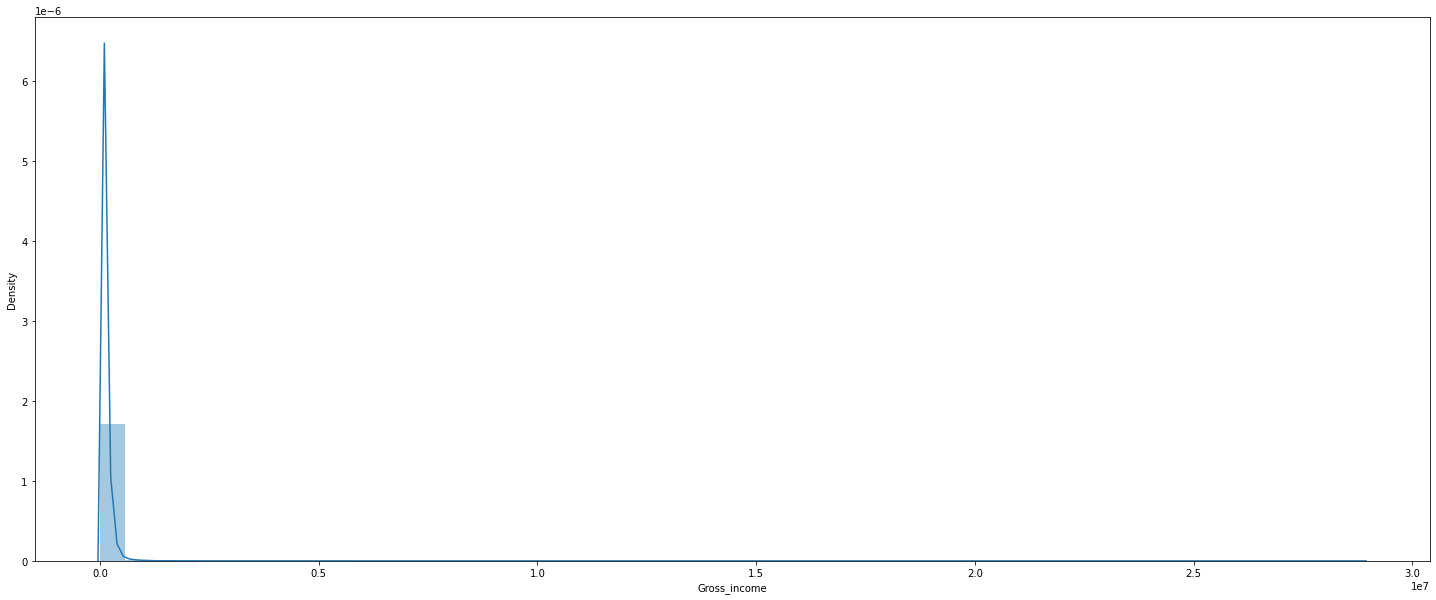

In [176]:
plt.figure(figsize=(25,10))
sns.distplot(data["Gross_income"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gross_income'>

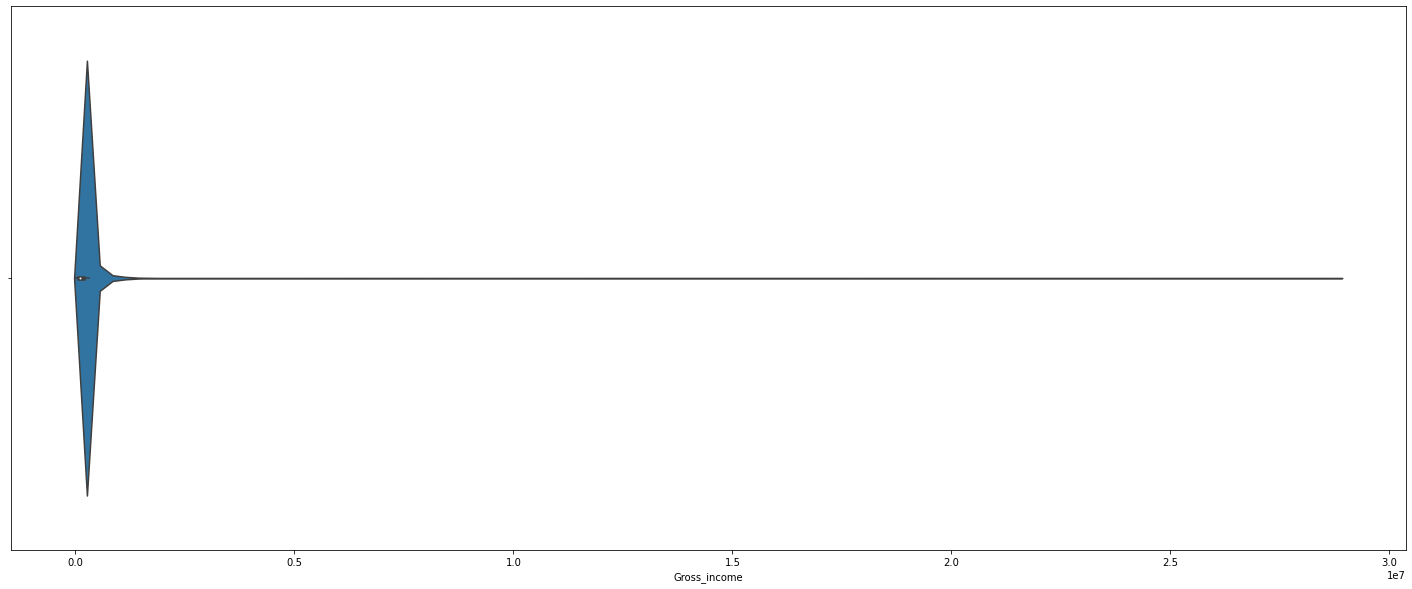

In [177]:
plt.figure(figsize=(25,10))
sns.violinplot(data["Gross_income"])

> Inferences: 

* From above two plots it can be observed that the data is heavily skewed and not normally distributed.

* Gross income denotes the total income of customer,it is continuous in nature and it forms important factor for clustering 
  Mean imputation of gross income will give more skewed results.  
  
  Example: It might not be feasible to impute the mean in place of Nan to a customer who has least or no income, it may       lead to incorrect clustering of target customers and marketing strategisation.
  
** > Solution/ Proposed approach : We may try to apply knn imputer for gross income , knn imputer accepts the value k and based on other columns of k nearest neighbours it may impute with nearest or appropriate gross income.

* Before Knn imputation is applied, skewness and outlier in all the columns is to be addressed and data has to be scaled.  

#### Checking the outliers

* outliers are to be checked for continuous columns

In [37]:
# Continuous columns

data.select_dtypes(include=['int64','float64'] )

,Customer_code,New_customer_Index,Primary_cust_index,Cust_type,Province_code_cust,Cust_activity,Gross_income,Saving_Account,Guarantees,Current_Account,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions_nom,Direct_Debit
0,1375586,0.0,1.0,1.0,29.0,1.0,87218.10,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,0.0,1.0,1.0,13.0,0.0,35548.74,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,0.0,1.0,1.0,13.0,0.0,122179.11,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,0.0,1.0,1.0,50.0,0.0,119775.54,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,0.0,1.0,1.0,50.0,1.0,NaN,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1183296,0.0,1.0,1.0,28.0,1.0,55516.98,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1
999996,1183295,0.0,1.0,1.0,15.0,1.0,75654.84,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,1183294,0.0,1.0,1.0,15.0,1.0,80634.87,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1
999998,1183293,0.0,1.0,1.0,28.0,1.0,57818.46,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,1


In [38]:
# While addressing null values we observed some columns to be float but are discrete/ordinal in nature, such columns can be
# removed

data.select_dtypes(include=['int64','float64'] ).drop(columns=["New_customer_Index","Primary_cust_index","Cust_type","Province_code_cust","Cust_activity","Gross_income",
"Payroll","Pensions_nom"])

,Customer_code,Saving_Account,Guarantees,Current_Account,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,Particular_Account,Particular_Plus_Account,...,e_account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Direct_Debit
0,1375586,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1050611,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1050612,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1050613,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1050614,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1183296,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
999996,1183295,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999997,1183294,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
999998,1183293,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
continuous_list=data.select_dtypes(include=['int64','float64'] ).drop(columns=["New_customer_Index","Primary_cust_index","Cust_type","Province_code_cust","Cust_activity",
"Payroll","Pensions_nom"]).columns

In [40]:
continuous_list

Index(['Customer_code', 'Gross_income', 'Saving_Account', 'Guarantees',
       'Current_Account', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'Más_particular_Account', 'Particular_Account',
       'Particular_Plus_Account', 'Short_term_deposits',
       'Medium_term_deposits', 'Long_term_deposits', 'e_account', 'Funds',
       'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit_Card', 'Securities',
       'Home_Account', 'Direct_Debit'],
      dtype='object')

In [41]:
for i in continuous_list:
    print("No of Unique values of ",i," are: ", data[i].nunique())
    print("***"*40)


No of Unique values of  Customer_code  are:  626159
************************************************************************************************************************
No of Unique values of  Gross_income  are:  395668
************************************************************************************************************************
No of Unique values of  Saving_Account  are:  2
************************************************************************************************************************
No of Unique values of  Guarantees  are:  2
************************************************************************************************************************
No of Unique values of  Current_Account  are:  2
************************************************************************************************************************
No of Unique values of  Derivada_Account  are:  2
*****************************************************************************************************

> Inference :

* From above it can be inferred that among the continuous columns only Customer_code and Gross_income are continuous and outliers and skewenss can be verified and addressed only for these two columns. 
* other columns are discrete/ordinal and have only two values, for test lets consider three such columns for verification

In [42]:
print("Unique value couunts of savings_account are : \n" ,data["Saving_Account"].value_counts() )
print("Unique value couunts of Short_term_deposits are : \n" ,data["Short_term_deposits"].value_counts() )
print("Unique value couunts of Junior_Account   are : \n" ,data["Junior_Account"].value_counts() )
print("Unique value couunts of Credit_Card are : \n" ,data["Credit_Card"].value_counts() )

Unique value couunts of savings_account are : 
 0    999823
1       177
Name: Saving_Account, dtype: int64
Unique value couunts of Short_term_deposits are : 
 0    997842
1      2158
Name: Short_term_deposits, dtype: int64
Unique value couunts of Junior_Account   are : 
 0    986377
1     13623
Name: Junior_Account, dtype: int64
Unique value couunts of Credit_Card are : 
 0    933916
1     66084
Name: Credit_Card, dtype: int64


#### Visualising the two columns for skewness and outliers
1) Customer_code
2) Gross_income

#### Outliers in Customer_mode

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


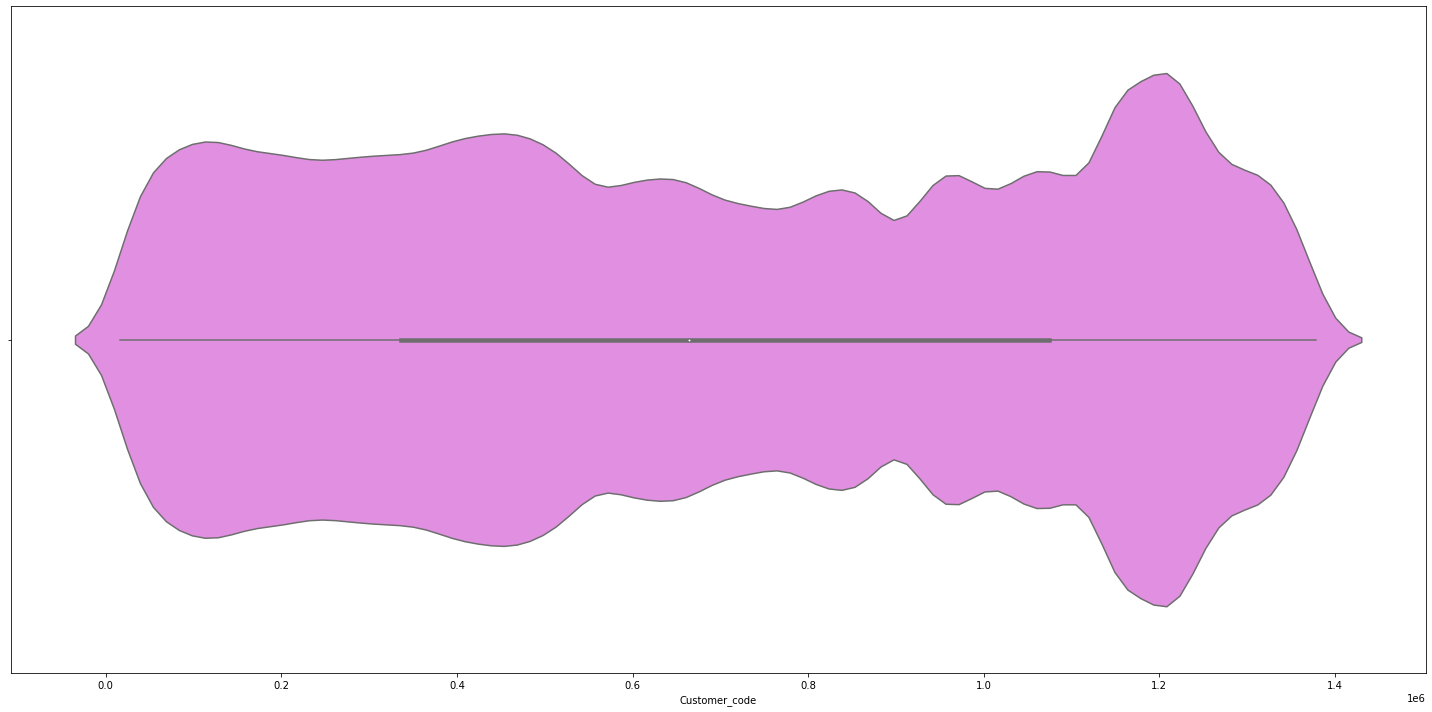

In [43]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,10),facecolor='white')
#plt.subplot(6,4,plotnumber)
sns.violinplot(data["Customer_code"],color="violet")
#plt.xlabel(Customer_code,fontsize=20)
plt.tight_layout()

> Inference :
No visible outliers in customer_code column


In [44]:
data["Customer_code"].skew()

0.032278438358485644

* As columns other than Gross_income do not have any outliers and customer_code donot have skewness, we can proceed impute
  null values of Gross_income with knn imputer
  
* Before that we have to encode the categorical data to numerical

In [45]:
data.select_dtypes(include=["object"])

,Employee_index,Cust_residence_country,Cust_gender,Age,Customer_seniority_months,Cust_relation,Residence_index,Foreigner_index,Channel_cust_join,Deceased_index,Province_name
0,N,ES,H,35,6,A,S,N,KHL,N,MALAGA
1,N,ES,V,23,35,I,S,S,KHE,N,CIUDAD REAL
2,N,ES,V,23,35,I,S,N,KHE,N,CIUDAD REAL
3,N,ES,H,22,35,I,S,N,KHD,N,ZARAGOZA
4,N,ES,V,23,35,A,S,N,KHE,N,ZARAGOZA
...,...,...,...,...,...,...,...,...,...,...,...
999995,N,ES,H,27,22,A,S,N,KFC,N,MADRID
999996,N,ES,H,56,22,A,S,N,KFC,N,"CORUÑA, A"
999997,N,ES,V,39,22,A,S,N,KFC,N,"CORUÑA, A"
999998,N,ES,V,36,22,A,S,S,KFC,N,MADRID


> Inference:

* Some columns like age , customer_seniority_onths are numbers, but dtype in dataset is object, possibility of junk values or spaces might be there it has to be adressed.
* After addressing the spaces ordinal encoder technique will be used to encode the categorical variables.
* Scaling of the data will be done
* then knn imputer will be used to impute the null values in Gross_income

#### Checking the data in Age and customer_seniority_months columns

In [64]:
data.loc[data["Age"]==' ']


,Date_Partition,Customer_code,Employee_index,Cust_residence_country,Cust_gender,Age,Date_first_contract,New_customer_Index,Customer_seniority_months,Primary_cust_index,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions_nom,Direct_Debit


> Inference : 
appearantly no data with  ' ' lets try converting Age column to float64 and try

In [ ]:
data.astype({'Age': 'float64'}).dtypes
data.astype({'Customer_seniority_months':'float64'}).dtypes

#ValueError: could not convert string to float: ' NA'
#ValueError: could not convert string to float: '     NA'

> Inference :

* on type conversion of Age and customer seniority months we found ' NA', '     NA'  to be present in data. lets find the 
  number of records and address these with imputation

In [67]:
data.loc[data["Age"]==' NA'].count()

Date_Partition               10782
Customer_code                10782
Employee_index               10782
Cust_residence_country       10782
Cust_gender                  10782
Age                          10782
Date_first_contract          10782
New_customer_Index           10782
Customer_seniority_months    10782
Primary_cust_index           10782
Cust_type                    10782
Cust_relation                10782
Residence_index              10782
Foreigner_index              10782
Channel_cust_join            10782
Deceased_index               10782
Province_code_cust           10782
Province_name                10782
Cust_activity                10782
Gross_income                     0
Saving_Account               10782
Guarantees                   10782
Current_Account              10782
Derivada_Account             10782
Payroll_Account              10782
Junior_Account               10782
Más_particular_Account       10782
Particular_Account           10782
Particular_Plus_Acco

In [10]:
data.loc[data["Customer_seniority_months"]=='     NA'].count()

Date_Partition               10782
Customer_code                10782
Employee_index               10782
Cust_residence_country       10782
Cust_gender                  10782
Age                          10782
Date_first_contract          10782
New_customer_Index           10782
Customer_seniority_months    10782
Primary_cust_index           10782
Cust_type                    10782
Cust_relation                10782
Residence_index              10782
Foreigner_index              10782
Channel_cust_join            10782
Deceased_index               10782
Province_code_cust           10782
Province_name                10782
Cust_activity                10782
Gross_income                     0
Saving_Account               10782
Guarantees                   10782
Current_Account              10782
Derivada_Account             10782
Payroll_Account              10782
Junior_Account               10782
Más_particular_Account       10782
Particular_Account           10782
Particular_Plus_Acco

#### Inferences of age and Customer_seniority_months

* It is completely ironic to observe the count of recors with NA in both and Age and customer_seniority column to be 10782 
  and it is very much similar to the no of records imputed for other column earlier with mode. 
  
> Suggested solution:
* the columns specified are age and customer seniority column and in place of mode imputation (may give skewed results) these values may be updated with 'nan' and same knn imputer proposed for Gross_income can be usitilised for these two columns



In [11]:
#updating the columns with nan
data["Age"]=data["Age"].replace(' NA',np.nan)
data["Customer_seniority_months"]=data["Customer_seniority_months"].replace('     NA',np.nan)

In [12]:
data["Age"]=data["Age"].astype(float)
data["Customer_seniority_months"]=data["Customer_seniority_months"].astype(float)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 44 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Date_Partition             1000000 non-null  datetime64[ns]
 1   Customer_code              1000000 non-null  int64         
 2   Employee_index             1000000 non-null  object        
 3   Cust_residence_country     1000000 non-null  object        
 4   Cust_gender                1000000 non-null  object        
 5   Age                        989218 non-null   float64       
 6   Date_first_contract        1000000 non-null  datetime64[ns]
 7   New_customer_Index         1000000 non-null  float64       
 8   Customer_seniority_months  989218 non-null   float64       
 9   Primary_cust_index         1000000 non-null  float64       
 10  Cust_type                  1000000 non-null  float64       
 11  Cust_relation              1000000 non

> Inferences:

* Age and customer seniority have been updated to float64 , now we can proceed with encoding of categorical features

In [19]:
for i in data.select_dtypes(include=["object"]).columns:
    print("Count of unique values of column " ,i , " is \n ", data[i].value_counts())
    print("***"*30)

Count of unique values of column  Employee_index  is 
  N    999042
B       387
A       287
F       282
S         2
Name: Employee_index, dtype: int64
******************************************************************************************
Count of unique values of column  Cust_residence_country  is 
  ES    993046
FR       546
AR       542
DE       487
GB       480
       ...  
TN         2
LB         2
GE         2
BZ         2
AL         1
Name: Cust_residence_country, Length: 113, dtype: int64
******************************************************************************************
Count of unique values of column  Cust_gender  is 
  V    572786
H    427214
Name: Cust_gender, dtype: int64
******************************************************************************************
Count of unique values of column  Cust_relation  is 
  A    558582
I    441377
P        41
Name: Cust_relation, dtype: int64
*******************************************************************************

In [21]:
data[data['Channel_cust_join'].str.contains('NA', na=False)]

,Date_Partition,Customer_code,Employee_index,Cust_residence_country,Cust_gender,Age,Date_first_contract,New_customer_Index,Customer_seniority_months,Primary_cust_index,...,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions_nom,Direct_Debit


> Inferences: 

* All the categorical data doesnt seems to have junk like ' NA' OR '     NA' and data seems to be clean. we can proceed       with encoding

#### Encoding the categorical data

* we will proceed with ordinal encoder

In [14]:
data.select_dtypes(include=["object"])

,Employee_index,Cust_residence_country,Cust_gender,Cust_relation,Residence_index,Foreigner_index,Channel_cust_join,Deceased_index,Province_name
0,N,ES,H,A,S,N,KHL,N,MALAGA
1,N,ES,V,I,S,S,KHE,N,CIUDAD REAL
2,N,ES,V,I,S,N,KHE,N,CIUDAD REAL
3,N,ES,H,I,S,N,KHD,N,ZARAGOZA
4,N,ES,V,A,S,N,KHE,N,ZARAGOZA
...,...,...,...,...,...,...,...,...,...
999995,N,ES,H,A,S,N,KFC,N,MADRID
999996,N,ES,H,A,S,N,KFC,N,"CORUÑA, A"
999997,N,ES,V,A,S,N,KFC,N,"CORUÑA, A"
999998,N,ES,V,A,S,S,KFC,N,MADRID


In [22]:
categorical_cols=data.select_dtypes(include=["object"]).columns
categorical_cols

Index(['Employee_index', 'Cust_residence_country', 'Cust_gender',
       'Cust_relation', 'Residence_index', 'Foreigner_index',
       'Channel_cust_join', 'Deceased_index', 'Province_name'],
      dtype='object')

In [24]:
oe = OrdinalEncoder()

for i in categorical_cols:
    data[i] = oe.fit_transform(data[i].values.reshape(-1,1).astype(str))
    

In [26]:
data.select_dtypes(include=["object"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 44 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Date_Partition             1000000 non-null  datetime64[ns]
 1   Customer_code              1000000 non-null  int64         
 2   Employee_index             1000000 non-null  float64       
 3   Cust_residence_country     1000000 non-null  float64       
 4   Cust_gender                1000000 non-null  float64       
 5   Age                        989218 non-null   float64       
 6   Date_first_contract        1000000 non-null  datetime64[ns]
 7   New_customer_Index         1000000 non-null  float64       
 8   Customer_seniority_months  989218 non-null   float64       
 9   Primary_cust_index         1000000 non-null  float64       
 10  Cust_type                  1000000 non-null  float64       
 11  Cust_relation              1000000 non

In [31]:
data_nodate=data.drop(columns=["Date_Partition","Date_first_contract"])

In [32]:
knnimp = KNNImputer(n_neighbors=5)
#data.drop(columns=["Date_Partition","Date_first_contract"]) = pd.DataFrame(knnimp.fit_transform(data.drop(columns=["Date_Partition","Date_first_contract"])))
data_nodate = pd.DataFrame(knnimp.fit_transform(data_nodate))

In [36]:
data_nodate.isnull().sum().sum()

0

In [37]:
import dill

dill.dump_session('customer_segmentation.db')

In [38]:
import joblib
joblib.dump(data_nodate,"customer_segmentation.pkl")

['customer_segmentation.pkl']

In [66]:
data_nodate

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1375586.0,3.0,34.0,0.0,35.0,0.0,6.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1050611.0,3.0,34.0,1.0,23.0,0.0,35.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1050612.0,3.0,34.0,1.0,23.0,0.0,35.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1050613.0,3.0,34.0,0.0,22.0,0.0,35.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1050614.0,3.0,34.0,1.0,23.0,0.0,35.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1183296.0,3.0,34.0,0.0,27.0,0.0,22.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
999996,1183295.0,3.0,34.0,0.0,56.0,0.0,22.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999997,1183294.0,3.0,34.0,1.0,39.0,0.0,22.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
999998,1183293.0,3.0,34.0,1.0,36.0,0.0,22.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
#Date_Partition , Date_first_contract
data["Date_Partition"].value_counts()

2015-01-28    625457
2015-02-28    374543
Name: Date_Partition, dtype: int64

In [83]:
data["Date_first_contract"].nunique()
data["Date_first_contract"].value_counts()

data.groupby("Date_first_contract").size()

print("Minimum date is : " ,data["Date_first_contract"].min())
print("Minimum date is : " ,data["Date_first_contract"].max())


data["Date_first_contract"].dt.year.value_counts()

Minimum date is :  1995-01-16 00:00:00
Minimum date is :  2015-02-27 00:00:00


2013    134844
2014     96149
2012     77159
2001     72988
2002     68726
2011     65530
2005     54079
2006     53444
2004     50485
2008     48559
2003     45213
2007     44005
2000     42859
1999     29847
1998     27820
2010     23042
2009     22814
1997     19203
1996     12927
1995      7997
2015      2310
Name: Date_first_contract, dtype: int64